<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/MinText_Aula05_Modelagem_com_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook é baseado no https://www.kaggle.com/code/dianalaveena/sentiment-analysis-on-movies-using-elmo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data

The sentiment labels are:

- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive




In [ ]:
!pip install nltk spacy wordcloud

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import pandas as pd
import spacy
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/2023.1/Pós-dados/mineração de dados/train.tsv.zip", sep="	")
# train.head()
train_Y = train['Sentiment']
train_X = train.drop(['Sentiment'], axis=1)

In [ ]:
train_Y

0         1
1         2
2         2
3         2
4         2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 156060, dtype: int64

In [ ]:
train_X

,PhraseId,SentenceId,Phrase
0,1,1,A series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...
2,3,1,A series
3,4,1,A
4,5,1,series
...,...,...,...
156055,156056,8544,Hearst 's
156056,156057,8544,forced avuncular chortles
156057,156058,8544,avuncular chortles
156058,156059,8544,avuncular


In [ ]:
# Função para limpeza dos dados
def text_clean(data):

    #Lower the text
    text_lower = [text.lower() for text in data]

    #Remove Hyperlink
    text_lower = [re.sub('[a-z]*?\.com[a-z]*?', ' ', text) for text in text_lower]

    #Remove Special Character
    text_lower = [re.sub('[^a-zA-Z]+', ' ', text) for text in text_lower]

    #Word Tokenize
    text_token = [word_tokenize(text) for text in text_lower]

    #Remove Stopwords
    stop_words = list(set(stopwords.words('english'))-{'not', 'no'}) # 'not' e 'no' são importantes para análise de sentimentos
    text_remstop = []
    for text in text_token:
        text_remstop.append([word for word in text if word not in stop_words])

    #Lemmatize
    text_lemm = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for text in text_remstop:
        text_lemm.append([wordnet_lemmatizer.lemmatize(word) for word in text])


    #Remove contextual words
    con_words = ['movie', 'n', 'lrb', 'rrb', 'can', 'th', 'director', 'writer', 'hour', 'two', 'york', 'sci', 'fi']
    text_remcon = []
    for text in text_lemm:
        text_remcon.append([word for word in text if word not in con_words])

    #Clean text
    clean_text = [' '.join(text) for text in text_remcon]

    return clean_text

In [ ]:
phrases_train_X = text_clean(train_X["Phrase"].values)
phrases_train_X

['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander occasionally amuses none amount much story',
 'also good gander occasionally amuses none amount much story',
 'also',
 'also',
 'good gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander',
 'gander',
 'gander',
 '',
 'occasionally amuses none amount much story',
 '',
 '',
 '',
 '',
 'occasionally amuses none amount much story',
 'occasionally',
 '

OBS: sempre que houver remoção de valores nulos ou estranhos do conjunto de dados de treinamento X (por exemplo, valores em branco ' ') também é necessário remover essas respectivas linhas dos rótulos Y.

### Dando uma olhada na núvem de palavras

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

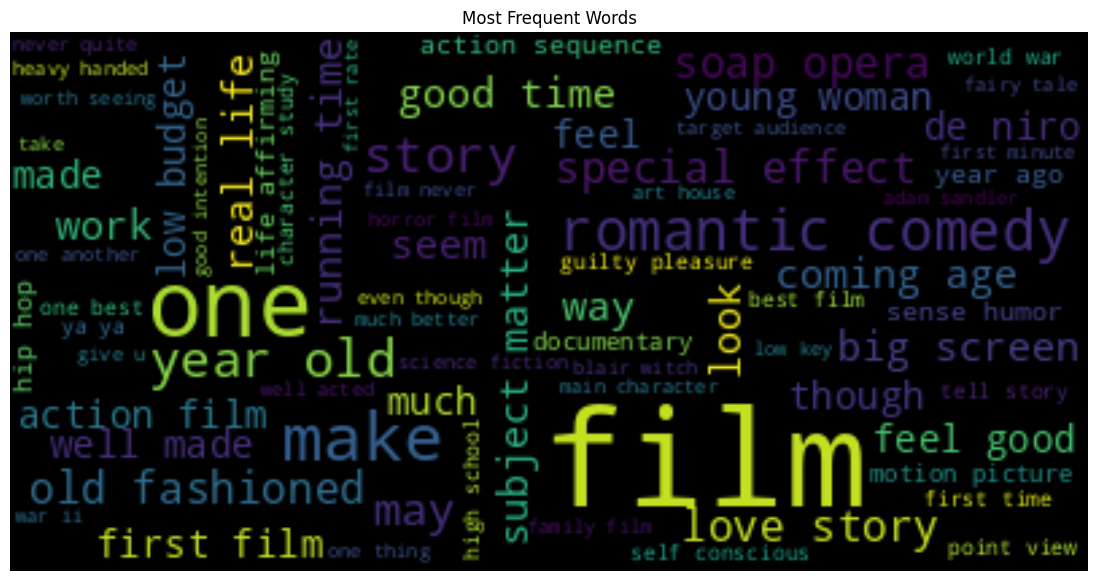

In [ ]:
posts = ' '.join(phrases_train_X)
wordcloud = WordCloud(max_font_size = 50, max_words = 75, background_color = "black").generate(posts)
#Display the generated image
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most Frequent Words")
plt.axis("off")
plt.show()

Ainda após a limpeza, existem algumas palavras estranhas, como 'ya ya', 'u', 'ii', etc.

### Olhando as frequências

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

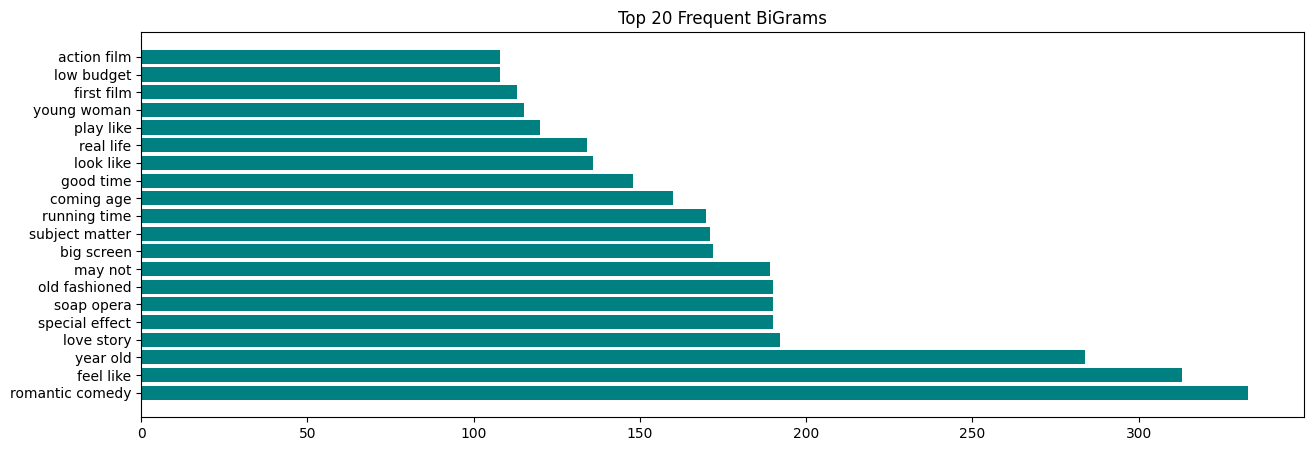

In [ ]:
CV = CountVectorizer(ngram_range = (2, 2), analyzer = 'word')
sparse_matrix = CV.fit_transform(phrases_train_X)
frequencies = sum(sparse_matrix).toarray()[0]
bigram_df = pd.DataFrame(frequencies, index=CV.get_feature_names_out(), columns=['frequency'])
top20_bigrams = bigram_df.sort_values(by = "frequency", ascending=False).head(20)
plt.figure(figsize = (15, 5))
plt.barh(width = top20_bigrams.frequency.values, y = top20_bigrams.index, color = 'teal')
plt.title("Top 20 Frequent BiGrams")
plt.show()

### Olhando as labels

In [ ]:
import numpy as np

<Axes: >

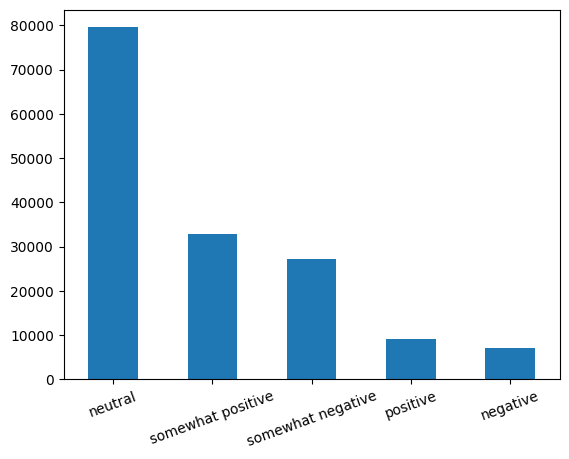

In [ ]:
train_label = pd.DataFrame()
train_label['Sentiment'] = np.where(train_Y.values==0, 'negative', np.where(train_Y.values==1, 'somewhat negative', np.where(train_Y.values==2, 'neutral', np.where(train_Y.values==3, 'somewhat positive', 'positive'))))
train_label['Sentiment'].value_counts()[:20].plot(kind='bar', rot=20)


# Importante ⚠
 **Para a Atividade pática, considere apenas até aqui!**

 Uma lib muito boa para fazer transferlearning e que pode ajudar a usar modelos mais complexos é a [Ludwig](https://ludwig.ai/latest/examples/sentiment_analysis/)

 Esse blog fala de como usar para classificaco de sentimentos e de quebra tem um notebook de exemplo [the-complete-guide-to-sentiment-analysis-with-ludwig-part-i](https://medium.com/predibase/the-complete-guide-to-sentiment-analysis-with-ludwig-part-i-65a9e6bc054e)

# Criando o Bert Embedding

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
# Aqui só queremos setar qual é o nivel de log que o TensorFlow vai printar
tf.get_logger().setLevel('ERROR')

tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

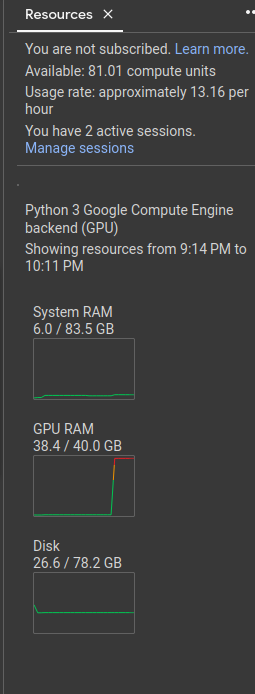

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(phrases_train_X))
print(tf.sigmoid(bert_raw_result))

ResourceExhaustedError: ignored